In [1]:
# import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from scipy.stats import chi2_contingency
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import accuracy_score

# ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# # INSTALL NLTK
# !pip install nltk
nltk.download("vader_lexicon")

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [3]:
# import the dataset
df = pd.read_excel(r"C:\Users\hp\Desktop\Data Science YouThrive\survey_data.xlsx")

# copy of the dataset
df_copy = df.copy()
df.head()

,Consent,age_group,country,education_level,occupation,income_range,purchase_sustainable_brand,categories,sustainable_categories (clothing_and_fashion),sustainable_categories (food_and_beverages),...,awareness_source (online_product_reviews),awareness_source (others),sustainable_brand_perception,positive_experience,negative_experience,trust_or_distrust factor,sustainable_emotions,price_justification_factor,research_likelihood,additional_comments
0,"Yes, I consent (Continue)",NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Yes, I consent (Continue)",NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Yes, I consent (Continue)",NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Yes, I consent (Continue)",NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Yes, I consent (Continue)",NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

In [4]:
# Checking for the null values
df.isna().sum()

Consent                                                                   0
age_group                                                                41
country                                                                  41
education_level                                                          41
occupation                                                              137
income_range                                                             41
purchase_sustainable_brand                                                0
categories                                                               41
sustainable_categories (clothing_and_fashion)                            41
sustainable_categories (food_and_beverages)                              41
sustainable_categories (beauty_and_personal_care)                        41
sustainable_categories (electronics)                                     41
sustainable_categories (household_or_cleaning_product)                   41
sustainable_

In [5]:
# Drop consent column
df = df.drop(columns=["Consent"])

# Delete first 41 rows
df = df.drop(df.index[:41]).reset_index(drop=True)

In [6]:
print("The shape before removing consent column and first 41 rows :",df_copy.shape)
print("The shape after removing consent columns and first 41 rows :",df.shape)

The shape before removing consent column and first 41 rows : (332, 32)
The shape after removing consent columns and first 41 rows : (291, 31)


In [7]:
# checking the dataset for duplicates rows and displaying them
duplicates = df[df.duplicated()]

#show duplicates
duplicates

,age_group,country,education_level,occupation,income_range,purchase_sustainable_brand,categories,sustainable_categories (clothing_and_fashion),sustainable_categories (food_and_beverages),sustainable_categories (beauty_and_personal_care),...,awareness_source (online_product_reviews),awareness_source (others),sustainable_brand_perception,positive_experience,negative_experience,trust_or_distrust factor,sustainable_emotions,price_justification_factor,research_likelihood,additional_comments
22,45–54,Canada,Doctorate / PhD,Doctor,£5100 and above,Yes,Other,No,No,No,...,Yes,No,More price but great product,Great customer service,Most sustainable brands never disappoint,A trust brand that give continuous value for y...,Relief,Cost,5.0,Building sustainable brands might be hard but ...
23,45–54,Canada,Doctorate / PhD,Doctor,£5100 and above,Yes,Other,No,No,No,...,Yes,No,More price but great product,Great customer service,Most sustainable brands never disappoint,A trust brand that give continuous value for y...,Relief,Cost,5.0,Building sustainable brands might be hard but ...
25,45–54,Canada,Doctorate / PhD,Doctor,£5100 and above,Yes,Other,No,No,No,...,Yes,No,More price but great product,Great customer service,Most sustainable brands never disappoint,A trust brand that give continuous value for y...,Relief,Competitive,5.0,Building sustainable brands might be hard but ...
26,45–54,Canada,Doctorate / PhD,Doctor,£5100 and above,Yes,Other,No,No,No,...,Yes,No,More price but great product,Great customer service,Most sustainable brands never disappoint,A trust brand that give continuous value for y...,Relief,Competitive,5.0,Building sustainable brands might be hard but ...
27,45–54,Canada,Doctorate / PhD,Doctor,£5100 and above,Yes,Other,No,No,No,...,Yes,No,More price but great product,Great customer service,Most sustainable brands never disappoint,A trust brand that give continuous value for y...,Relief,Competitive,5.0,Building sustainable brands might be hard but ...


In [8]:
# removing the duplicates in the dataset

df = df.drop_duplicates()
print("The shape before removing duplicates :",df_copy.shape)
print("The shape after removing duplicates :",df.shape)

The shape before removing duplicates : (332, 32)
The shape after removing duplicates : (286, 31)


## Exploratory Data Analysis

In [9]:
# age_group Distribution
age_group_Freq = df["age_group"].value_counts().reset_index()
# rename column 
age_group_Freq.columns = ["age_group","Frequency"]
# add percentage column
age_group_Freq["Percentage"] = (age_group_Freq["Frequency"] / age_group_Freq["Frequency"].sum()) * 100
# converting percentage to 2 d.p
age_group_Freq["Percentage"] = age_group_Freq["Percentage"].round(2)
age_group_Freq

,age_group,Frequency,Percentage
0,25–34,130,45.45
1,18–24,117,40.91
2,35–44,33,11.54
3,45–54,5,1.75
4,55 and above,1,0.35


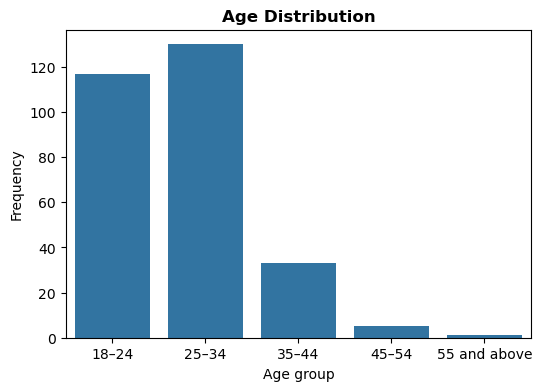

In [10]:
# AgeDistribution

plt.figure(figsize=(6,4))
order = ["18–24", "25–34", "35–44", "45–54", "55 and above"]

#Axis
sns.barplot(x = age_group_Freq["age_group"], 
            y = age_group_Freq["Frequency"],
             data=age_group_Freq.reset_index(),  # convert index to column if needed
                order=order
)

plt.title("Age Distribution",fontweight="bold")
plt.xlabel("Age group")
plt.ylabel("Frequency")
plt.show()

In [11]:
# Country Distribution
country_Freq = df['country'].value_counts().reset_index()
# rename column 
country_Freq.columns = ['country','Frequency']
# add percentage column
country_Freq['Percentage'] = (country_Freq['Frequency'] / country_Freq['Frequency'].sum()) * 100
# converting percentage to 2 d.p
country_Freq['Percentage'] = country_Freq['Percentage'].round(2)
country_Freq

,country,Frequency,Percentage
0,United Kingdom,153,53.50
1,Nigeria,77,26.92
2,Canada,13,4.55
3,Ukraine,4,1.40
4,Ghana,4,1.40
5,USA,4,1.40
6,Ireland,3,1.05
7,Scotland,3,1.05
8,Togo,3,1.05
9,Italy,2,0.70


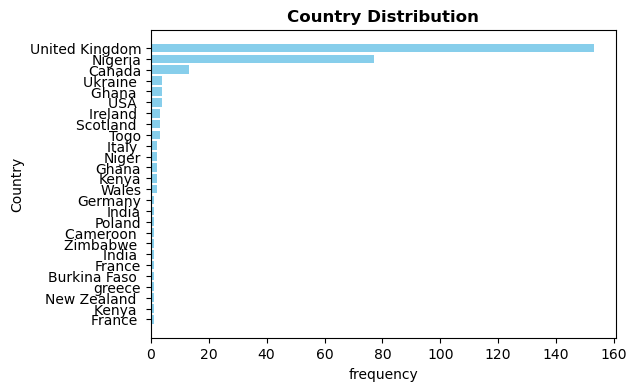

In [12]:
# Country Distribution
x = country_Freq['country']
y = country_Freq['Frequency']

plt.figure(figsize=(6,4))
# create horizontal barchart
plt.barh(x,y,color='skyblue')

# Invert the y-axis to ensure the highest count is at the top
plt.gca().invert_yaxis()

# Add title 
plt.title("Country Distribution",fontweight='bold')

plt.xlabel("frequency")
plt.ylabel("Country")

# show plot
plt.show()

In [13]:
#Education Level Distribution
Edu_Freq = df['education_level'].value_counts().reset_index()
# rename column 
Edu_Freq.columns = ['education','Frequency']
# add percentage column
Edu_Freq['Percentage'] = (Edu_Freq['Frequency'] / Edu_Freq['Frequency'].sum()) * 100
# converting percentage to 2 d.p
Edu_Freq['Percentage'] = Edu_Freq['Percentage'].round(2)
Edu_Freq

,education,Frequency,Percentage
0,Bachelor’s degree,154,53.85
1,Secondary / High school,85,29.72
2,Master’s degree,36,12.59
3,Doctorate / PhD,6,2.10
4,Other,5,1.75


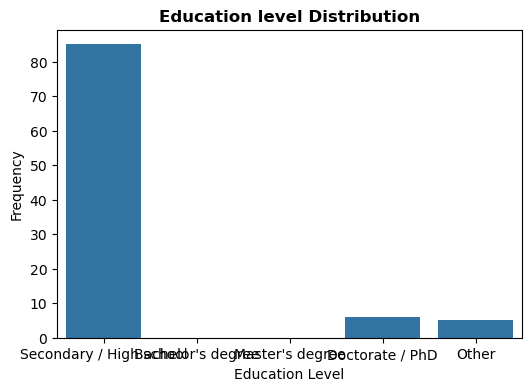

In [14]:
# Education level Distribution Chart

plt.figure(figsize=(6,4))
order = ['Secondary / High school', "Bachelor's degree", "Master's degree", 'Doctorate / PhD', 'Other']

#Axis
sns.barplot(x = Edu_Freq['education'], 
            y = Edu_Freq['Frequency'],
            
             data=age_group_Freq.reset_index(),  # convert index to column if needed
                order=order
)

plt.title("Education level Distribution", fontweight='bold')
plt.xlabel("Education Level")
plt.ylabel("Frequency")
plt.show()

In [15]:
# Income level Distribution
income_Freq = df['income_range'].value_counts().reset_index()
# rename column 
income_Freq.columns = ['income','Frequency']
# add percentage column
income_Freq['Percentage'] = (income_Freq['Frequency'] / income_Freq['Frequency'].sum()) * 100
# converting percentage to 2 d.p
income_Freq['Percentage'] = income_Freq['Percentage'].round(2)
income_Freq

,income,Frequency,Percentage
0,£1000–£3000,156,54.55
1,Below £1000,59,20.63
2,£3100–£5000,48,16.78
3,Prefer not to say,16,5.59
4,£5100 and above,7,2.45


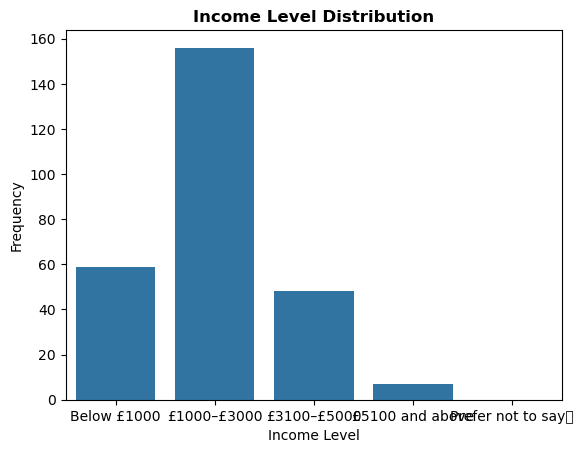

In [16]:
# Income level Distribution

# plt.figure(figsize=(6,4))
order = ['Below £1000', '£1000–£3000', '£3100–£5000', '£5100 and above', 'Prefer not to say	']

#Axis
sns.barplot(x = income_Freq['income'], 
            y = income_Freq['Frequency'],
            
             data=income_Freq.reset_index(),  # convert index to column if needed
                order=order
)

plt.title("Income Level Distribution",fontweight='bold')
plt.xlabel("Income Level")
plt.ylabel("Frequency")
plt.show()

In [17]:
# purchase sustainable brand distribution
brand_Freq = df['purchase_sustainable_brand'].value_counts().reset_index()
# rename column 
brand_Freq.columns = ['Purchase_sustainable','Frequency']
# add percentage column
brand_Freq['Percentage'] = (brand_Freq['Frequency'] / brand_Freq['Frequency'].sum()) * 100
# converting percentage to 2 d.p
brand_Freq['Percentage'] = brand_Freq['Percentage'].round(2)
brand_Freq

,Purchase_sustainable,Frequency,Percentage
0,Yes,247,86.36
1,Not sure,26,9.09
2,No,13,4.55


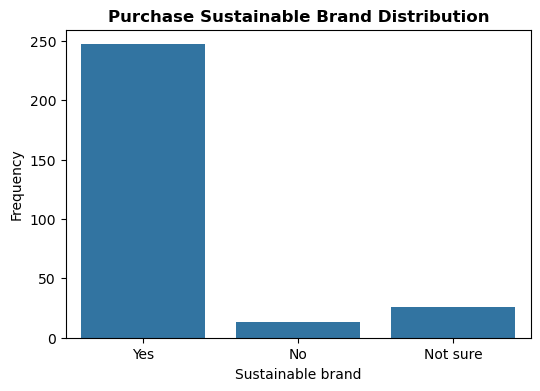

In [18]:
# Purchase sustainable brand Distribution

plt.figure(figsize=(6,4))
order = ['Yes', 'No', 'Not sure']

#Axis
sns.barplot(x = brand_Freq['Purchase_sustainable'], 
            y = brand_Freq['Frequency'],
            
             data=income_Freq.reset_index(),  # convert index to column if needed
                order=order
)

plt.title("Purchase Sustainable Brand Distribution",fontweight='bold')
plt.xlabel("Sustainable brand")
plt.ylabel("Frequency")
plt.show()

In [19]:
# purchase frequency distribution
purchase_Freq = df['purchase_frequency'].value_counts().reset_index()
# rename column 
purchase_Freq.columns = ['Purchase_frequency','Frequency']
# add percentage column
purchase_Freq['Percentage'] = (purchase_Freq['Frequency'] / purchase_Freq['Frequency'].sum()) * 100
# converting percentage to 2 d.p
purchase_Freq['Percentage'] = purchase_Freq['Percentage'].round(2)
purchase_Freq

,Purchase_frequency,Frequency,Percentage
0,Often,145,50.70
1,Sometimes,62,21.68
2,Always,48,16.78
3,Rarely,27,9.44
4,Never,4,1.40


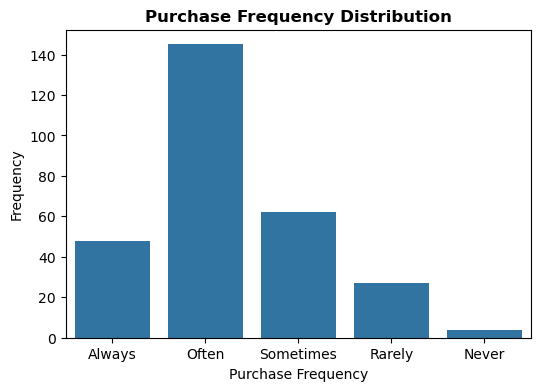

In [20]:
# Purchase frequency Distribution

plt.figure(figsize=(6,4))
order = ['Always', 'Often', 'Sometimes', 'Rarely', 'Never']

#Axis
sns.barplot(x = purchase_Freq['Purchase_frequency'], 
            y = purchase_Freq['Frequency'],
            
             data=income_Freq.reset_index(),  # convert index to column if needed
                order=order
)

plt.title("Purchase Frequency Distribution",fontweight='bold')
plt.xlabel("Purchase Frequency")
plt.ylabel("Frequency")
plt.show()

In [21]:
# Select all sustainable category columns
sustainable_cols = [col for col in df.columns if col.startswith('sustainable_categories')]
# Create frequency and percentage table
results = pd.DataFrame()

for col in sustainable_cols:
    yes_count = (df[col] == "Yes").sum()
    no_count = (df[col] == "No").sum()
    total = yes_count + no_count
    
    results.loc[col, "Frequency"] = yes_count
    # results.loc[col, "No_Count"] = no_count
    results.loc[col, "Percentage"] = round((yes_count / total) * 100, 2) if total > 0 else 0

results = results.reset_index().rename(columns={
    "index": "Sustainable Category",
    # "Frequency": "Frequency",
    # "Percentage": "Percentage"
})
results

,Sustainable Category,Frequency,Percentage
0,sustainable_categories (clothing_and_fashion),241.0,84.27
1,sustainable_categories (food_and_beverages),217.0,75.87
2,sustainable_categories (beauty_and_personal_care),232.0,81.12
3,sustainable_categories (electronics),219.0,76.57
4,sustainable_categories (household_or_cleaning_...,216.0,75.52
5,sustainable_categories (automobile_and_energy),179.0,62.59
6,sustainable_categories (others),18.0,6.29


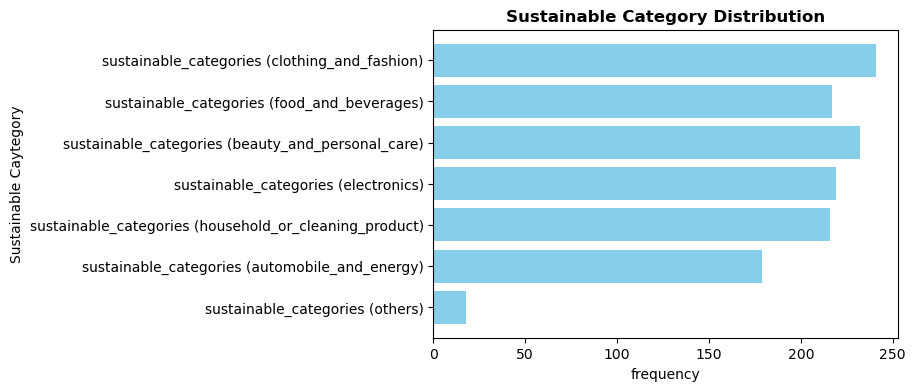

In [22]:
# Sustainable category distribution
x = results['Sustainable Category']
y = results['Frequency']

plt.figure(figsize=(6,4))
# # create horizontal barchart
plt.barh(x,y,color='skyblue')

# # Invert the y-axis to ensure the highest count is at the top
plt.gca().invert_yaxis()

# # Add title 
plt.title("Sustainable Category Distribution",fontweight='bold')

plt.xlabel("frequency")
plt.ylabel("Sustainable Caytegory")

# show plot
plt.show()

In [23]:
awareness_cols = [col for col in df.columns if col.startswith('awareness_source')]
# Create frequency and percentage table
awareness = pd.DataFrame()

for col in awareness_cols:
    yes_count = (df[col] == "Yes").sum()
    no_count = (df[col] == "No").sum()
    total = yes_count + no_count
    
    awareness.loc[col, "Frequency"] = yes_count
    # results.loc[col, "No_Count"] = no_count
    awareness.loc[col, "Percentage"] = round((yes_count / total) * 100, 2) if total > 0 else 0

awareness = awareness.reset_index().rename(columns={
    "index": "Awareness source",
    # "Frequency": "Frequency",
    # "Percentage": "Percentage"
})
awareness

,Awareness source,Frequency,Percentage
0,awareness_source (social_media),231.0,80.77
1,awareness_source (product_packaging_or_labelling),216.0,75.52
2,awareness_source (news_or_documentaries),208.0,72.73
3,awareness_source (friends_or_families),218.0,76.22
4,awareness_source (brand_advertisement or websi...,227.0,79.37
5,awareness_source (online_product_reviews),215.0,75.17
6,awareness_source (others),5.0,1.75


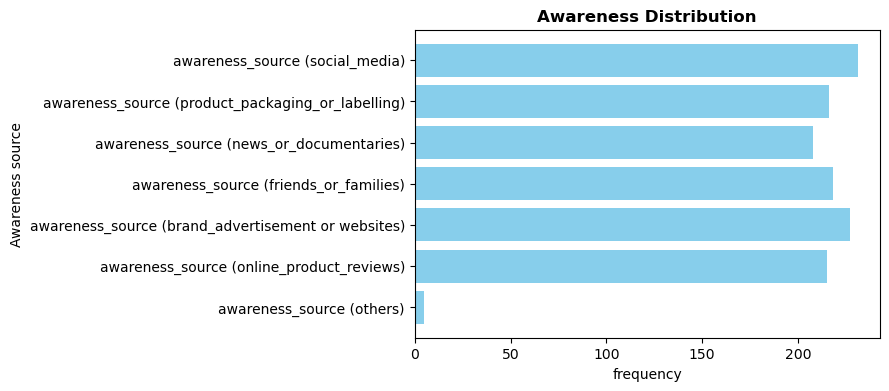

In [24]:
# Awareness source distribution
x = awareness['Awareness source']
y = awareness['Frequency']

plt.figure(figsize=(6,4))
# # create horizontal barchart
plt.barh(x,y,color='skyblue')

# # Invert the y-axis to ensure the highest count is at the top
plt.gca().invert_yaxis()

# # Add title 
plt.title("Awareness Distribution",fontweight='bold')

plt.xlabel("frequency")
plt.ylabel("Awareness source")

# show plot
plt.show()

In [25]:
# Categorise sustainable claim 
import re
import pandas as pd

def clean_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    return text

theme_keywords = {
    "Support local communities": [
        "local", "community", "communities", "local sourcing",
        "local suppliers", "support local"],
    "Quality products": [
        "durable", "better", "quality", "strong", "reliability", "comfortable",
        "reliable", "good", "never", "fair", "satisfaction"],
    "Enviromentally friendly": [
        "eco friendly", "environmentally", "sustainable", "pollution", "recycling",
        "green", "recyclable", "renewable", "ecosystems"],
    "No clear information provided": [
        "no information", "no details", "not provided",
        "nothing stated", "no clear"]
}

def assign_category(text):
    for category, keywords in theme_keywords.items():
        for word in keywords:
            if word in text:
                return category
    return "Health and safety benefits "

df["clean_text"] = df["sustainable_brand_perception"].apply(clean_text)
df["sustainability_category"] = df["clean_text"].apply(assign_category)

In [26]:
# sustainable category distribution
sust = df["sustainability_category"].value_counts().reset_index()
# rename column 
sust.columns = ["sustainable category","Frequency"]
# add percentage column
sust["Percentage"] = (sust["Frequency"] / sust["Frequency"].sum()) * 100
# converting percentage to 2 d.p
sust["Percentage"] = sust["Percentage"].round(2)
sust

,sustainable category,Frequency,Percentage
0,Enviromentally friendly,159,55.59
1,Health and safety benefits,73,25.52
2,Quality products,33,11.54
3,Support local communities,21,7.34


In [27]:
# Categorise Barrier Negative experience
def clean_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    return text

theme_keywords = {
    "Available in limited quantity": ["limited",
        "sales"],
    "Bad customer services": [
        "delaying"," customer", "insults", "rude", "lateness", "nonchalant", "bad", "not"],
    "High cost": [
        "high", "cost", "hard", "expensive"],
    "Low quality": [
        "bad","quality", "fake", "poor", "wear","wore", "washes", "ugly"],
    "Contain harmful chemicals": ["harmful"  
    ],
    "Vague information provided" : ["vague", "genuine"
    ]
        
}

def assign_category(text):
    for category, keywords in theme_keywords.items():
        for word in keywords:
            if word in text:
                return category
    return ""

df["clean_text"] = df["negative_experience"].apply(clean_text)
df["barrier_category"] = df["clean_text"].apply(assign_category)

In [28]:
# Barrier distribution
# remove blank or null barrier categories first
df_clean = df[df["barrier_category"].notna() & (df["barrier_category"].str.strip() != "")]
# count frequency
barrier = df_clean["barrier_category"].value_counts().reset_index()
# rename columns
barrier.columns = ["barrier_category", "Frequency"]
# add percentage column
barrier["Percentage"] = (barrier["Frequency"] / barrier["Frequency"].sum()) * 100
# round percentage to 2 decimal places
barrier["Percentage"] = barrier["Percentage"].round(2)
barrier

,barrier_category,Frequency,Percentage
0,Vague information provided,74,29.84
1,Contain harmful chemicals,65,26.21
2,Low quality,45,18.15
3,Available in limited quantity,34,13.71
4,Bad customer services,24,9.68
5,High cost,6,2.42


In [29]:
# categorise drivers (trust or distrust) 
def clean_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    return text

theme_keywords = {
    "Support local communities": [
        "social"],
    "Products durability": [
        "durable", "trust", "quality", "value", "loyalty", "consistency",
        "reliable", "good", "accountability", "fair", "satisfaction"],
    "Past track records": ["track", "record", "third", "certifications"],
    "Eco friendly": [
        "eco-friendly", "sustainable", "climate", "recycling",
        "green", "recyclable", "renewable", "ecosystems"],
    "Clear information": ["detailed"]
}

def assign_category(text):
    for category, keywords in theme_keywords.items():
        for word in keywords:
            if word in text:
                return category
    return "Clear information"

df["clean_text"] = df["trust_or_distrust factor"].apply(clean_text)
df["driver_category"] = df["clean_text"].apply(assign_category)

In [30]:
# driver distributions
drive = df["driver_category"].value_counts().reset_index()
# rename column 
drive.columns = ["drivers category","Frequency"]
# add percentage column
drive["Percentage"] = (drive["Frequency"] / drive["Frequency"].sum()) * 100
# converting percentage to 2 d.p
drive["Percentage"] = drive["Percentage"].round(2)
drive

,drivers category,Frequency,Percentage
0,Clear information,114,39.86
1,Products durability,85,29.72
2,Eco friendly,43,15.03
3,Support local communities,29,10.14
4,Past track records,15,5.24


In [31]:
# sustainable emotion distribution
emotion_Freq = df['sustainable_emotions'].value_counts().reset_index()
# rename column 
emotion_Freq.columns = ['sustainable_emotion','Frequency']
# add percentage column
emotion_Freq['Percentage'] = (emotion_Freq['Frequency'] / emotion_Freq['Frequency'].sum()) * 100
# converting percentage to 2 d.p
emotion_Freq['Percentage'] = emotion_Freq['Percentage'].round(2)
emotion_Freq

,sustainable_emotion,Frequency,Percentage
0,Good,137,47.90
1,Relief,66,23.08
2,Inspiration,42,14.69
3,Honesty,25,8.74
4,Satisfaction,16,5.59


#### Test of association between socioeconmic characteristics and perception of sustainable brands.

In [32]:
# Age group and perception of sustainable brands
table = pd.crosstab(df['age_group'], df['sustainability_category'])
chi2, p, dof, expected = chi2_contingency(table)

#Show cross tabulation
print("Cross tablulation")
display(table)
# Display results
print("\nChi-square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
# print("\nExpected Frequencies:\n", expected)

if p < 0.05:
    print("Significant")
else: 
    print("Not Significant")

Cross tablulation


sustainability_category,Enviromentally friendly,Health and safety benefits,Quality products,Support local communities
age_group,,,,
18–24,70,27,13,7
25–34,74,34,9,13
35–44,15,9,9,0
45–54,0,3,1,1
55 and above,0,0,1,0



Chi-square Statistic: 29.00596925450893
P-value: 0.003931957510568707
Degrees of Freedom: 12
Significant


In [33]:
# education level and perception of sustainable brands
table = pd.crosstab(df['education_level'], df['sustainability_category'])
chi2, p, dof, expected = chi2_contingency(table)

#Show cross tabulation
print("Cross tabulation")
display(table)

# Display results
print("\nChi-square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
# print("\nExpected Frequencies:\n", expected)

if p < 0.05:
    print("Significant")
else: 
    print("Not Significant")

Cross tabulation


sustainability_category,Enviromentally friendly,Health and safety benefits,Quality products,Support local communities
education_level,,,,
Bachelor’s degree,89,39,13,13
Doctorate / PhD,0,4,1,1
Master’s degree,15,12,9,0
Other,0,3,2,0
Secondary / High school,55,15,8,7



Chi-square Statistic: 32.991267198389956
P-value: 0.0009710598233977006
Degrees of Freedom: 12
Significant


In [34]:
# occupation and perception of sustainable brands
table = pd.crosstab(df['occupation'], df['sustainability_category'])
chi2, p, dof, expected = chi2_contingency(table)

#Show cross tabulation
# print(table)

# Display results
print("\nChi-square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
# print("\nExpected Frequencies:\n", expected)

if p < 0.05:
    print("Significant")
else: 
    print("Not Significant")


Chi-square Statistic: 279.8640645699373
P-value: 0.3745581500770089
Degrees of Freedom: 273
Not Significant


In [35]:
# income range and perception of sustainable brands
table = pd.crosstab(df['income_range'], df['sustainability_category'])
chi2, p, dof, expected = chi2_contingency(table)

#Show cross tabulation
display(table)

# Display results
print("\nChi-square Statistic:", chi2)
print("P-value:", p.round(4))
print("Degrees of Freedom:", dof)
# print("\nExpected Frequencies:\n", expected)

if p < 0.05:
    print("Significant")
else: 
    print("Not Significant")

sustainability_category,Enviromentally friendly,Health and safety benefits,Quality products,Support local communities
income_range,,,,
Below £1000,31,13,10,5
Prefer not to say,2,8,6,0
£1000–£3000,97,37,10,12
£3100–£5000,29,11,4,4
£5100 and above,0,4,3,0



Chi-square Statistic: 40.51712114944414
P-value: 0.0001
Degrees of Freedom: 12
Significant


In [36]:
# country and perception of sustainable brands
table = pd.crosstab(df['country'], df['sustainability_category'])
chi2, p, dof, expected = chi2_contingency(table)
#Show cross tabulation
# print(table)

# Display results
print("\nChi-square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
# print("\nExpected Frequencies:\n", expected)

if p < 0.05:
    print("Significant")
else: 
    print("Not Significant")


Chi-square Statistic: 85.71373744847662
P-value: 0.1866987080041165
Degrees of Freedom: 75
Not Significant


In [37]:
# Extract two columns 
df[['price_justification_factor','sustainability_category']].head()


,price_justification_factor,sustainability_category
0,Cost,Quality products
1,Quality,Health and safety benefits
2,Prices,Quality products
3,Quality,Quality products
4,Public policy,Health and safety benefits


In [38]:
# price_sentiment_distribution

Pr_sent = df['price_justification_factor'].value_counts().reset_index()
# rename column 
Pr_sent.columns = ['Price justification','Frequency']
# add percentage column
Pr_sent['Percentage'] = (Pr_sent['Frequency'] / Pr_sent['Frequency'].sum()) * 100
# converting percentage to 2 d.p
Pr_sent['Percentage'] = Pr_sent['Percentage'].round(2)
Pr_sent

,Price justification,Frequency,Percentage
0,Prices,76,26.57
1,Cost,56,19.58
2,Quality,54,18.88
3,Public policy,44,15.38
4,Reliable,33,11.54
5,Competitive,23,8.04


In [39]:
# Test of association between price justification and sustainable_brand_perception
table = pd.crosstab(df['price_justification_factor'], df['sustainability_category'])
chi2, p, dof, expected = chi2_contingency(table)
#Show cross tabulation
display(table)

# Display results
print("\nChi-square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)

if p < 0.05:
    print("Significant")
else: 
    print("Not Significant")

sustainability_category,Enviromentally friendly,Health and safety benefits,Quality products,Support local communities
price_justification_factor,,,,
Competitive,10,6,6,1
Cost,38,12,3,3
Prices,46,18,9,3
Public policy,21,15,1,7
Quality,28,13,10,3
Reliable,16,9,4,4



Chi-square Statistic: 24.277944117604555
P-value: 0.06052134806757553
Degrees of Freedom: 15
Not Significant
